# Ejercicio 1: Cómo muestrear una distribución de probabilidad

_Reproduce las gráficas para la **densidad de probabilidad** y la **distribución acumulada** de una gaussiana que se muestran en las diapositivas._

Recordemos que la densidad de probabilidad de una gaussiana es

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x - \mu)^2/2\sigma^2} 
$$

y su función de distribución está dada por

$$
F(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\frac{x - \mu}{\sigma}} e^{-y^2/2} dy = \frac{1}{2}\Big[1 + erf\Big(\frac{x - \mu}{\sigma \sqrt{2}}\Big)\Big]
$$

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spe
import pylab
import math
import random

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

Text(0.5,1,'Probabilidad gaussiana para $\\mu = 70$ y $\\sigma = 1$')

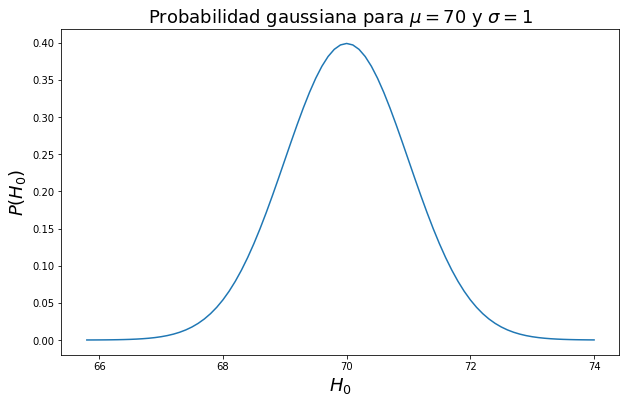

In [21]:
x = [i for i in np.arange(65.8, 74.0, 0.1)]

def fx_gauss(x, sigma, mu):
    return (math.exp(-0.5 * ((x - mu) / sigma)**2) * 1.0 / (sigma * math.sqrt(2.0 * math.pi)))

vecfun = np.vectorize(fx_gauss)

sigma = 1.0
mu = 70.0

plt.plot(x, vecfun(x, sigma, mu))
    
plt.xlabel(r'$H_0$', fontsize = 18)
plt.ylabel(r'$P(H_0)$', fontsize = 18)
plt.title(r'Probabilidad gaussiana para $\mu = 70$ y $\sigma = 1$', fontsize = 18)

Text(0.5,1,'Distribución acumulada gaussiana para $\\mu = 70$ y $\\sigma = 1$')

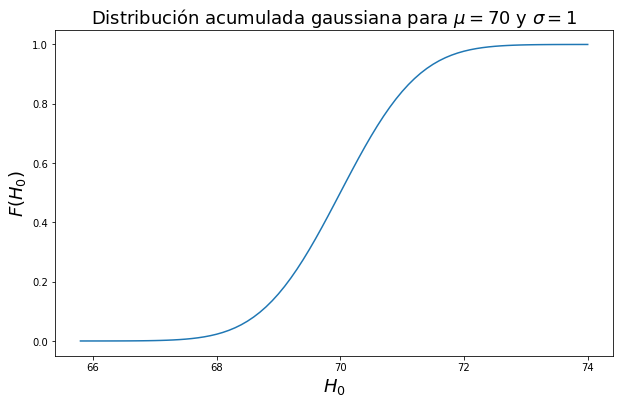

In [24]:
x = [i for i in np.arange(65.8, 74.0, 0.1)]

def cmd_gauss(x, sigma, mu):
    return 0.5 * (1.0 + spe.erf((x - mu) / (math.sqrt(2.0) * sigma)))

vecfun = np.vectorize(cmd_gauss)

sigma = 1.0
mu = 70.0

plt.plot(x, vecfun(x, sigma, mu))
    
plt.xlabel(r'$H_0$', fontsize = 18)
plt.ylabel(r'$F(H_0)$', fontsize = 18)
plt.title(r'Distribución acumulada gaussiana para $\mu = 70$ y $\sigma = 1$', fontsize = 18)

_Genera números aleatorios entre 0 y 1, y utiliza la función de distribución acumulada para asignar el correspondiente valor de $ H_0 $. Haz el histograma de $ H_0 $ para verificar que lo hiciste bien. Usa $ \mu = 70 $ y $ \sigma = 2 $._

Para esto, necesitamos la **inversa de la función de distribución**:

$$
F^{-1}(x) = erf^{-1}(2x - 1)\sqrt{2}\sigma + \mu
$$

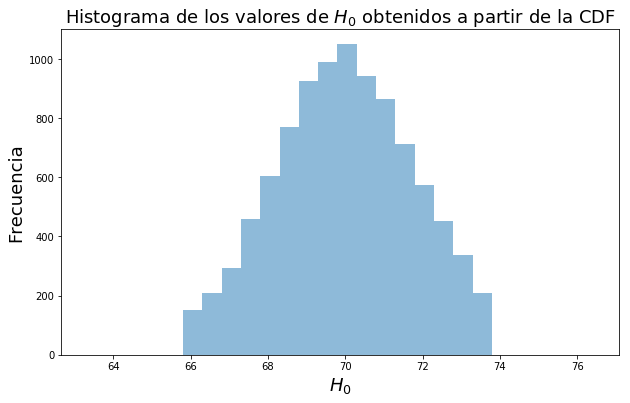

In [34]:
def inverse_cmd_gauss(x, sigma, mu):
    return spe.erfinv(2.0 * x - 1.0) * math.sqrt(2.0) * sigma + mu

vecfun = np.vectorize(inverse_cmd_gauss)

sigma = 2.0
mu = 70.0
H0_values = []

for i in range(10000):
    rand_num = random.random()
    H0_values.append(vecfun(rand_num, sigma, mu))

bins = np.arange(65.8, 74.0, 0.5) # Fijo el tamaño del bin

plt.xlim([min(H0_values), max(H0_values)])

plt.hist(H0_values, bins=bins, alpha=0.5)
plt.title(r'Histograma de los valores de $H_0$ obtenidos a partir de la CDF', fontsize = 18)
plt.xlabel(r'$H_0$', fontsize = 18)
plt.ylabel('Frecuencia', fontsize = 18)

plt.show()